In [100]:
from bs4 import BeautifulSoup as bs
import requests
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from collections import Counter

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 150

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
url = "https://2021.aclweb.org/program/accept/"
html = requests.get(url).text
soup = bs(html, 'html.parser')

In [53]:
all_tags = soup.find_all('strong')
n_grams = [1, 2, 3]
all_grams = {1: [], 2: [], 3: []}
for tag in all_tags[:-1]:
    tokenized_tag = word_tokenize(tag.text)
    for n in n_grams:
        for grams in ngrams(tag.text.lower().split(), n):
            all_grams[n].append(' '.join(grams))
    

In [58]:
remove_these = set(stopwords.words('english'))

In [59]:
unigrams = [w for w in all_grams[1] if w not in remove_these]

In [62]:
fq_dist_unigrams = FreqDist(unigrams)

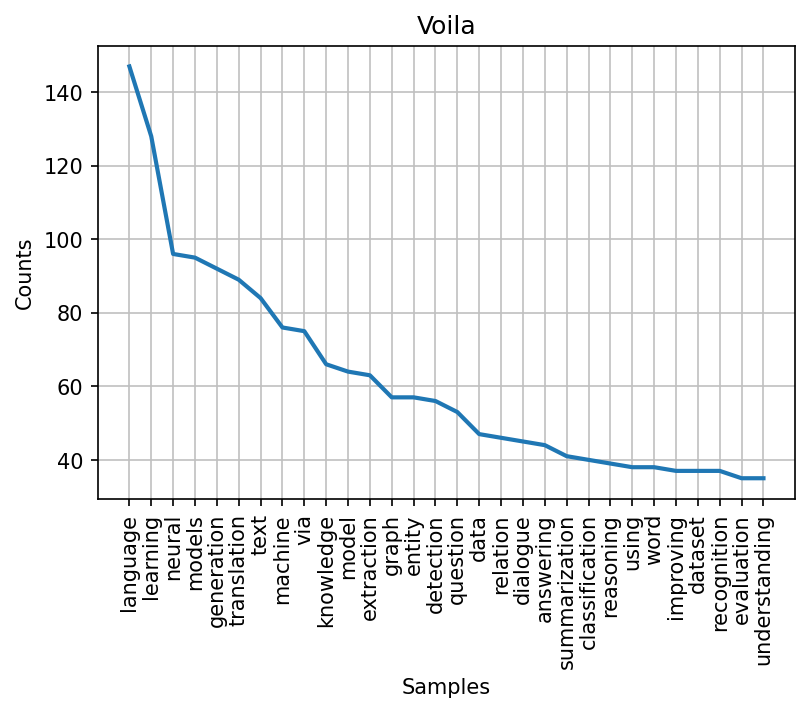

<AxesSubplot:title={'center':'Voila'}, xlabel='Samples', ylabel='Counts'>

In [73]:
fq_dist_unigrams.plot(30, title='Voila')

<BarContainer object of 20 artists>

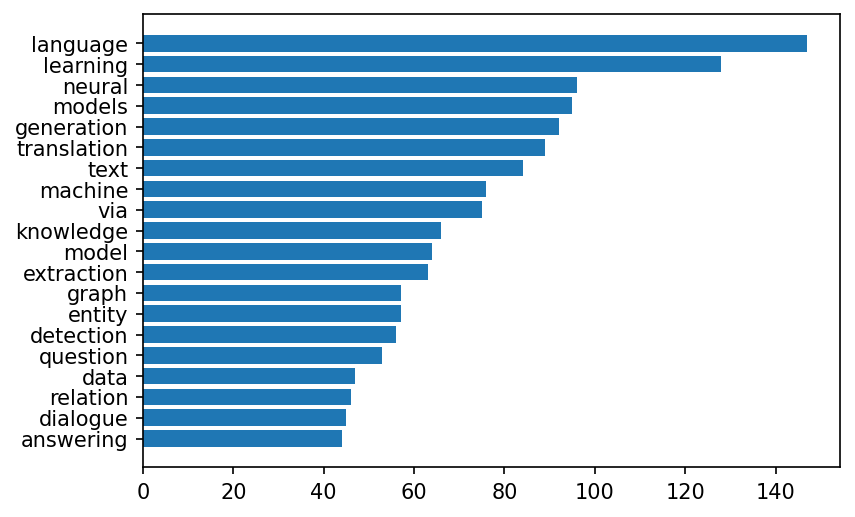

In [116]:
c = Counter(fq_dist_unigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)

<BarContainer object of 20 artists>

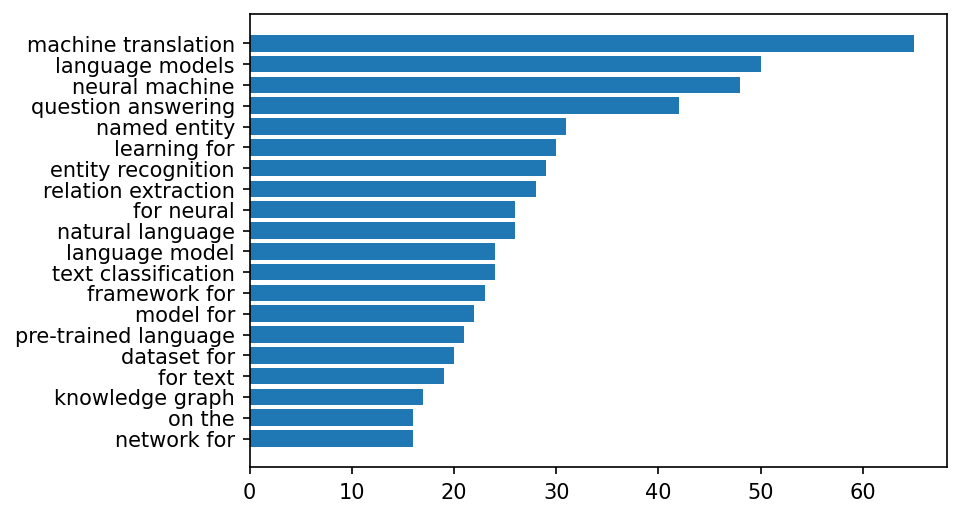

In [115]:
c = Counter(fq_dist_bigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)

<BarContainer object of 20 artists>

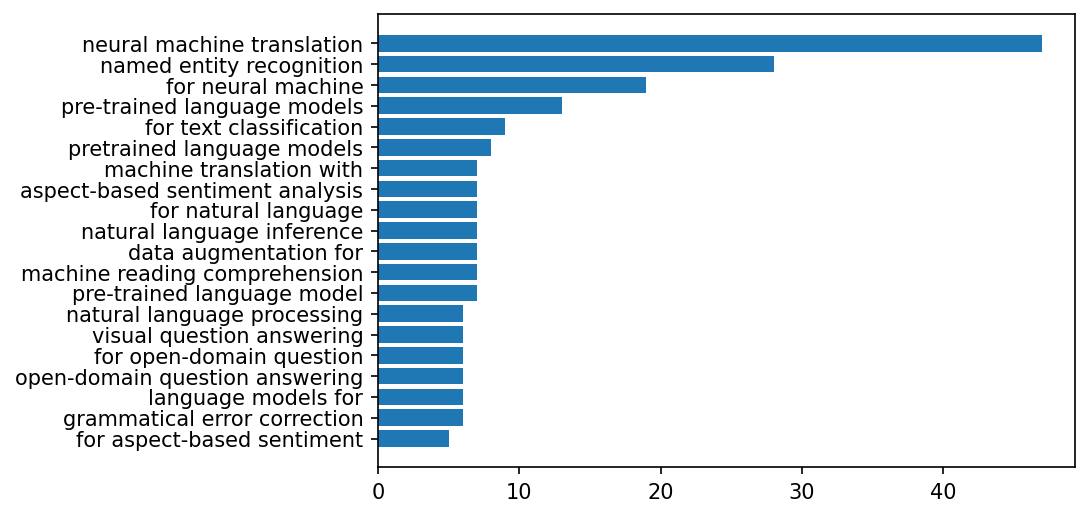

In [114]:
c = Counter(fq_dist_trigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)